In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from covid_tracking_data.collector import *
from covid_analysis.utility import *
from covid_analysis.models import *
from ourworldindata_org.collector import *

In [3]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

### Fetch data set from local disk

In [4]:
!ls ~/data/
# gets thte latest file names
recent = ! ls -drt ~/data/* | tail -n 2
print("Latest files are:\n\t{}\n\t{}".format(*recent))

2020-04-07_2224_state_daily_data.csv 2020-04-14_1618_state_daily_data.csv
2020-04-07_2224_state_rank.csv       2020-04-14_1618_state_rank.csv
2020-04-08_2053_state_daily_data.csv 2020-04-15_1846_state_daily_data.csv
2020-04-08_2053_state_rank.csv       2020-04-15_1846_state_rank.csv
2020-04-09_1613_state_daily_data.csv 2020-04-16_1914_state_daily_data.csv
2020-04-09_1613_state_rank.csv       2020-04-16_1914_state_rank.csv
2020-04-10_1539_state_daily_data.csv 2020-04-17_0042_state_daily_data.csv
2020-04-10_1539_state_rank.csv       2020-04-17_0042_state_rank.csv
2020-04-10_1555_state_daily_data.csv 2020-04-17_0043_state_daily_data.csv
2020-04-10_1555_state_rank.csv       2020-04-17_0043_state_rank.csv
2020-04-10_2050_state_daily_data.csv 2020-04-17_0126_state_daily_data.csv
2020-04-10_2050_state_rank.csv       2020-04-17_0126_state_rank.csv
2020-04-11_1640_state_daily_data.csv 2020-04-17_0132_state_daily_data.csv
2020-04-11_1640_state_rank.csv       2020-04-17_0132_state_rank.csv
2020-0

In [5]:
df, states_in_order = get_dataset_df_from_file(recent)
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,fips,daily_new_death,hospitalizedIncrease,negativeIncrease,daily_new_positive,totalTestResultsIncrease,order,last_update,population
0,2020-03-04,NY,6.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,...,54.0,36,NaN,NaN,NaN,NaN,NaN,0,2020-04-19,19453561.0
1,2020-03-05,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,...,98.0,36,0.0,0.0,28.0,16.0,44.0,0,2020-04-19,19453561.0
2,2020-03-06,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,...,125.0,36,0.0,0.0,16.0,11.0,27.0,0,2020-04-19,19453561.0
3,2020-03-07,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,...,168.0,36,0.0,0.0,0.0,43.0,43.0,0,2020-04-19,19453561.0
4,2020-03-08,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,...,197.0,36,0.0,0.0,0.0,29.0,29.0,0,2020-04-19,19453561.0


### SIR Model

In [6]:
dfq = get_state_df(df, "*")
cc = CurrentCasesUndercount()
dfq = cc.add_positive_estimate(dfq)
ccd = CurrentCasesFromDeaths()
dfq = ccd.add_positive_estimate(dfq, params={"a": 220, "shift": 10})
dfq.head()

,date,positive,daily_new_positive,death,daily_new_death,tests,daily_new_positive_undercount,positive_undercount,daily_new_positive_fromdeath,positive_fromdeath
0,2020-02-28,9.0,0.0,4.0,0.0,9.0,0.0,0,0.0,6820
1,2020-02-29,18.0,9.0,5.0,1.0,18.0,16.2,16,220.0,7260
2,2020-03-01,40.0,12.0,8.0,3.0,40.0,21.6,37,660.0,8580
3,2020-03-02,53.0,13.0,11.0,3.0,53.0,23.4,61,660.0,10340
4,2020-03-03,94.0,41.0,14.0,3.0,100.0,73.8,135,660.0,11220


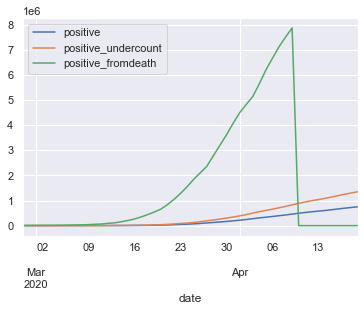

In [7]:
dfq.plot(x="date", y=["positive", "positive_undercount", "positive_fromdeath"])

,day_number,date,positive_predicted,positive,new_daily_positive,hospitalized_ident,icu_ident
51,52,2020-04-19,794001,749203.0,35936.0,44151,11773
52,53,2020-04-20,831641,0.0,37640.0,46244,12331
53,54,2020-04-21,871064,0.0,39423.0,48436,12916
54,55,2020-04-22,912357,0.0,41293.0,50732,13528
55,56,2020-04-23,955607,0.0,43250.0,53137,14169
56,57,2020-04-24,1000908,0.0,45301.0,55656,14841
57,58,2020-04-25,1048356,0.0,47448.0,58294,15545
58,59,2020-04-26,1098053,0.0,49697.0,61058,16282
59,60,2020-04-27,1150106,0.0,52053.0,63952,17054
60,61,2020-04-28,1204627,0.0,54521.0,66984,17862


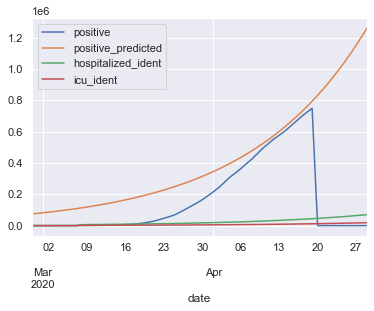

In [8]:
# Exponential Model
mp = ModelProjectionExponential()
d = mp.project(dfq, 10)
d.plot(x="date", y=["positive", "positive_predicted", "hospitalized_ident", "icu_ident"])
d.tail(11)

### SIR Fit

   direc: array([[1.06680273e-04, 2.83278041e-03, 1.29442520e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.04788784e-04, 1.32932164e-03, 8.58976878e-01]])
     fun: 5450274.013450557
 message: 'Optimization terminated successfully.'
    nfev: 686
     nit: 14
  status: 0
 success: True
       x: array([ 0.2516568 ,  0.14748859, 18.14079303])
######################################################################
Day 0 = 2020-02-18 00:00:00  (today=51)
Doubling time is about 2.75 days
Recovery time is about 4.70 days
Estimated initial infection was order of 18,140 poeple


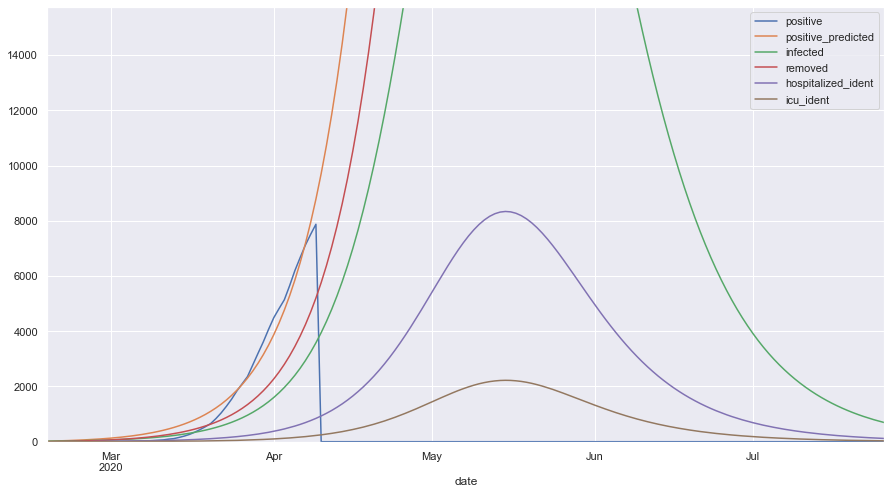

In [9]:
N=350000 
x0 = (0.25749545, 0.10952173, 3.17810689)  # beta, gamma, I0
c = ccd.fit_series/1000
start_date = dfq.date.values[0] - pd.Timedelta(days=ccd.shift)
sf = SIR()
(N, I0, R0, beta, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])

### SIR4: Try Varying beta as part of the model

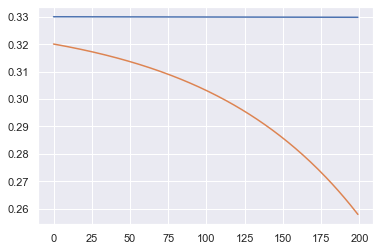

In [10]:
def g(alpha, beta0, t):
    return beta0 - alpha * t

def h(alpha, beta0, t):
    return beta0 - np.log(alpha) * alpha ** t

t = np.arange(0, 200, 1)
plt.plot(t, g(.000001, .33, t))
plt.plot(t, h(1.01, .33, t))
plt.show()

/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


   direc: array([[-1.88037720e-06, -3.54932059e-02, -3.13380672e-02,
         3.66303295e-02],
       [-1.71522991e-06, -3.16239924e-02, -2.90674383e-02,
         3.29362994e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-9.87418879e-08, -2.49626779e-03, -2.39812825e-03,
         2.62870473e-03]])
     fun: 1101865.643984398
 message: 'Optimization terminated successfully.'
    nfev: 1496
     nit: 25
  status: 0
 success: True
       x: array([1.38805108e-05, 4.78345556e-01, 2.54721976e-01, 2.57662374e-01])
######################################################################
Day 0 = 2020-02-18 00:00:00  (today=51)
Doubling time is about 2.75 days
Recovery time is about 2.72 days
Estimated initial infection was order of 257 poeple


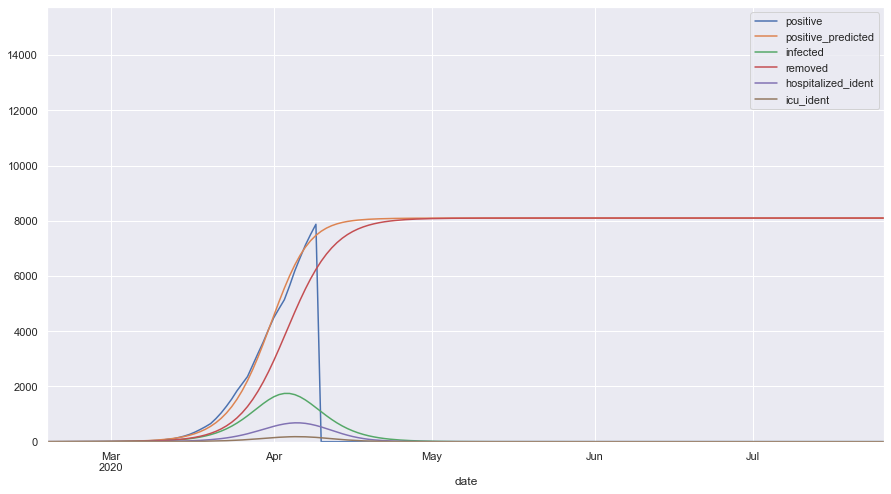

In [11]:
N=350000 
x0 = (0.01313296, 0.87278724, 0.33722395, 0.01900052)  # alpha, beta0, gamma, I0
c = ccd.fit_series/1000
start_date = dfq.date.values[0] - pd.Timedelta(days=ccd.shift)
sf = SIR4()
(N, I0, R0, beta0, alpha, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta0, alpha, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])

In [12]:
dfw, wsl = get_dataset_df_from_files()
dfw.head()

,Entity,state,Date,positive,Total confirmed deaths due to COVID-19 (deaths),date,last_update,daily_new_positive
0,Afghanistan,AFG,"Dec 31, 2019",0,0,2019-12-31,2020-04-19 23:31:59.449794,NaN
1,Afghanistan,AFG,"Jan 1, 2020",0,0,2020-01-01,2020-04-19 23:31:59.449794,0.0
2,Afghanistan,AFG,"Jan 2, 2020",0,0,2020-01-02,2020-04-19 23:31:59.449794,0.0
3,Afghanistan,AFG,"Jan 3, 2020",0,0,2020-01-03,2020-04-19 23:31:59.449794,0.0
4,Afghanistan,AFG,"Jan 4, 2020",0,0,2020-01-04,2020-04-19 23:31:59.449794,0.0


In [13]:
dfq = get_state_df(dfw, "ITA")
ccd = CurrentCasesFromDeaths()
dfq = ccd.add_positive_estimate(dfq)
N=60000 
R0=0
x0 = (0.33821616, 0.15247499, 2.6568561)
sf = SIR()
c = ccd.fit_series/1000
(N, I0, R0, beta, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])

KeyError: 'daily_new_death'

In [ ]:
N=60000 
x0 = (4.13379338e-05, 7.42328935e-01, 5.71938181e-01, 2.09353947e-04)  # alpha, beta0, gamma, I0
c = ccd.fit_series/1000
start_date = dfq.date.values[0] - pd.Timedelta(days=ccd.shift)
sf = SIR4()
(N, I0, R0, beta0, alpha, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta0, alpha, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])

In [ ]:
dfq = get_state_df(dfw, "ESP")
ccd = CurrentCasesFromDeaths()
dfq = ccd.add_positive_estimate(dfq)
N=47000
R0=0
x0 = (0.2262658 , 0.14456682, 0.43210381 )
sf = SIR()
(N, I0, R0, beta, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])

In [ ]:
N=47000 
x0 = (6.23470525e-05, 7.62581143e-01, 5.41117221e-01, 1.10624820e-06)  # alpha, beta0, gamma, I0
c = ccd.fit_series/1000
start_date = dfq.date.values[0] - pd.Timedelta(days=ccd.shift)
sf = SIR4()
(N, I0, R0, beta0, alpha, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta0, alpha, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])